This Colab notebook for homework 4 is mostly the same as homeworks 2 and 3.

In [0]:
%load_ext tensorboard

In [0]:
%tensorboard --logdir log

In [0]:
import homework
import homework.train

In [0]:
from collections import namedtuple
args = namedtuple('args', 'log_dir other_args')
args.log_dir = 'log'
args.other_args = 'something'

In [0]:
homework.train.train(args)

Download your saved model with:

In [ ]:
from google.colab import files
files.download('homework/det.th')

In [234]:
import torch
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

torch.Size([1, 1, 59, 59])


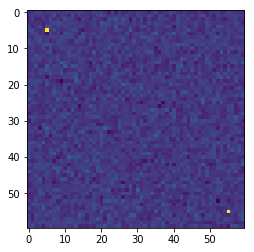

In [286]:
t = torch.randn([60,60])
t[55,55] = 20
t[5,5] = 20
mp2d = torch.nn.functional.max_pool2d(t[None, None], kernel_size=8, stride=1,
                                    padding=3, return_indices=True)
print(mp2d[0].shape)
plt.imshow(t)

In [76]:
d = 54
topk = torch.topk(m, k=54)
ids = []
for row_id in range(d):
    row = topk.indices[row_id]
    row_ids = []
    for col_id in range(d):
        row_ids.append((row_id, col_id))
    ids.append(row_ids)
    
values = 

In [320]:
t = torch.randn([150,100])
t[55,55] = 20
#t[55,5] = 20

In [321]:
heatmap = t
max_pool_ks=7
min_score=-5
max_det=100

W, H = heatmap.shape
maxpool2d = torch.nn.functional.max_pool2d
padding = int(max_pool_ks/2)
max2d = maxpool2d(heatmap[None, None], kernel_size=max_pool_ks, stride=1,
                padding=padding, return_indices=True)
max_values, max_indices = max2d

is_local_max = heatmap == max_values.view((W,H))
is_large_enough = max_values >= min_score
local_maxes = max_values[is_local_max & is_large_enough]
local_max_indices = max_indices[is_local_max & is_large_enough]

topk = torch.topk(local_maxes, k=min(max_det, len(local_maxes)))
output = []
for v, i in zip(topk[0], topk[1]):
    idx = local_max_indices[i]
    x = int(idx % W)
    y = int(idx/H)
    output.append((v.item(), x, y))
    
output;

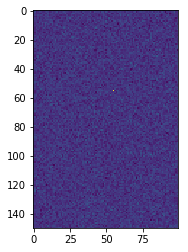

In [322]:
plt.imshow(t)

In [326]:
int(5555 % 100)

55

In [332]:
extract_peak(t)

############ shape: torch.Size([150, 100])
7 -5 100
tensor(20.)
tensor(5555)
[(20.0, 55, 55), (4.1428351402282715, 132, 4), (4.0177154541015625, 99, 81), (3.9771721363067627, 94, 64), (3.489961862564087, 21, 57), (3.4782330989837646, 79, 95), (3.3510000705718994, 40, 49), (3.2692902088165283, 60, 86), (3.2595365047454834, 139, 75), (3.2566792964935303, 117, 2), (3.2093772888183594, 31, 85), (3.2009217739105225, 61, 61), (3.1919469833374023, 36, 67), (3.174569606781006, 12, 43), (3.140749454498291, 66, 79), (3.138254165649414, 117, 48), (3.115999460220337, 15, 20), (3.0922470092773438, 122, 29), (3.025519371032715, 141, 90), (2.944748640060425, 119, 87)]


[(20.0, 55, 55),
 (4.1428351402282715, 132, 4),
 (4.0177154541015625, 99, 81),
 (3.9771721363067627, 94, 64),
 (3.489961862564087, 21, 57),
 (3.4782330989837646, 79, 95),
 (3.3510000705718994, 40, 49),
 (3.2692902088165283, 60, 86),
 (3.2595365047454834, 139, 75),
 (3.2566792964935303, 117, 2),
 (3.2093772888183594, 31, 85),
 (3.2009217739105225, 61, 61),
 (3.1919469833374023, 36, 67),
 (3.174569606781006, 12, 43),
 (3.140749454498291, 66, 79),
 (3.138254165649414, 117, 48),
 (3.115999460220337, 15, 20),
 (3.0922470092773438, 122, 29),
 (3.025519371032715, 141, 90),
 (2.944748640060425, 119, 87),
 (2.9372169971466064, 145, 92),
 (2.9120774269104004, 86, 35),
 (2.9029886722564697, 37, 71),
 (2.893781900405884, 77, 59),
 (2.89288592338562, 20, 15),
 (2.892353057861328, 5, 25),
 (2.88873291015625, 70, 42),
 (2.863612651824951, 135, 38),
 (2.831989049911499, 114, 43),
 (2.8248562812805176, 82, 47),
 (2.8237504959106445, 16, 64),
 (2.8113062381744385, 132, 27),
 (2.800938606262207, 100, 19)

In [331]:
def extract_peak(heatmap, max_pool_ks=7, min_score=-5, max_det=100):
	"""
	   Your code here.
	   Extract local maxima (peaks) in a 2d heatmap.
	   @heatmap: H x W heatmap containing peaks (similar to your training heatmap)
	   @max_pool_ks: Only return points that are larger than a max_pool_ks x max_pool_ks window around the point
	   @min_score: Only return peaks greater than min_score
	   @return: List of peaks [(score, cx, cy), ...], where cx, cy are the position of a peak and score is the
				heatmap value at the peak. Return no more than max_det peaks per image
	"""
	print('############ shape:', heatmap.shape)
	print(max_pool_ks, min_score, max_det)

	H, W = heatmap.shape
	print(heatmap.max())
	print(heatmap.argmax())

	maxpool2d = torch.nn.functional.max_pool2d
	padding = int(max_pool_ks/2)
	max2d = maxpool2d(heatmap[None, None], kernel_size=max_pool_ks, stride=1,
					padding=padding, return_indices=True)
	max_values, max_indices = max2d

	is_local_max = heatmap == max_values.view((H,W))
	is_large_enough = max_values >= min_score
	local_maxes = max_values[is_local_max & is_large_enough]
	local_max_indices = max_indices[is_local_max & is_large_enough]

	topk = torch.topk(local_maxes, k=min(max_det, len(local_maxes)))
	output = []
	for v, i in zip(topk[0], topk[1]):
		idx = local_max_indices[i]
		y = int(idx % W)
		x = int(idx / W)
		output.append((v.item(), x, y))

	print(output[:20])
		
	return output[:max_det]

In [339]:
import homework
import homework.train
from homework import models
from importlib import reload
reload(homework), reload(models), reload(homework.train), reload(homework.utils);

from collections import namedtuple
args = namedtuple('args', 'log_dir other_args')
args.log_dir = 'log'
args.learning_rate = 0.001
args.num_epoch = 5
args.gamma = 2
args.continue_training = False